In [ ]:
#reading the data using pandas
import pandas as pd


In [ ]:
#importing Data
store_Data = pd.read_csv('/content/store_data.csv')

In [ ]:
#showing data
store_Data.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Converting the data to feed the model

final_data = pd.DataFrame(columns=['Transaction', 'Item']) #creating columns
store_Data = store_Data.T #accessing the numPy array

for col in store_Data.columns:
  col_data = list(store_Data[col].dropna()) #removing rows containing null values
  temp_dict = {'Transaction':[int(col)]*len(col_data),
               'Items':col_data}
  temp_df = pd.DataFrame(temp_dict)
  final_data = final_data.append(temp_df,ignore_index=True) # adding the found data the end of the list.

final_data.head()

,Transaction,Item,Items
0,0,NaN,burgers
1,0,NaN,meatballs
2,0,NaN,eggs
3,1,NaN,chutney
4,2,NaN,turkey


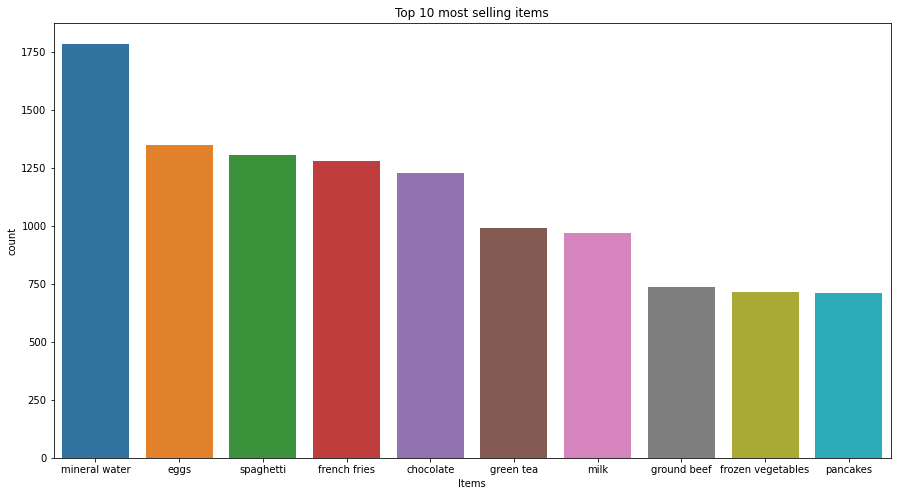

In [ ]:
#Visualing and ploting data
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8)) # for the graph frame
order = final_data['Items'].value_counts()[:10].index #ordering 10 most selling items
sns.countplot(x = 'Items', data=final_data,order = order)
plt.title('Top 10 most selling items')
plt.show()

In [ ]:
# Number of unique items and total number of transactions
len(final_data['Items'].unique())
len(final_data['Transaction'].unique())

7500

In [ ]:
# Converting the data in the required format

final_data_dummy = pd.get_dummies(final_data['Items']) # data manupulation, converting categorical data into indicator variables.
final_data_dummy['Transaction'] = final_data['Transaction']

In [ ]:
# Knowing that product is bought or not using encode_units function

def encode_units(x):
  if x <= 0:
    return 0
  if x >= 1:
    return 1

format_data = final_data_dummy.groupby('Transaction').sum() #spliting the data into groups by transaction
format_data = format_data.applymap(encode_units) #applying the encode_unitd function

format_data.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
Transaction,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Applying Apriori algorithm using mlxtend library
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Getting support values for each combination

# min_support is the limit of support value
# frequent_itemsets has frequency of each item and its combination

frequent_itemsets  =  apriori(format_data, min_support = 0.01, use_colnames = True)

frequent_itemsets.head()

,support,itemsets
0,0.020267,(almonds)
1,0.033200,(avocado)
2,0.010800,(barbecue sauce)
3,0.014267,(black tea)
4,0.011467,(body spray)


In [ ]:
# Applying association rules to get confidence and lift values

result = association_rules(frequent_itemsets, metric = "confidence", min_threshold=0.01)
result.sort_values('confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
372,"(ground beef, eggs)",(mineral water),0.020000,0.238267,0.010133,0.506667,2.126469,0.005368,1.544054
408,"(ground beef, milk)",(mineral water),0.022000,0.238267,0.011067,0.503030,2.111207,0.005825,1.532756
347,"(chocolate, ground beef)",(mineral water),0.023067,0.238267,0.010933,0.473988,1.989319,0.005437,1.448130
395,"(frozen vegetables, milk)",(mineral water),0.023600,0.238267,0.011067,0.468927,1.968075,0.005444,1.434328
301,(soup),(mineral water),0.050533,0.238267,0.023067,0.456464,1.915771,0.011026,1.401441
...,...,...,...,...,...,...,...,...,...
294,(mineral water),(red wine),0.238267,0.028133,0.010933,0.045887,1.631053,0.004230,1.018607
427,(mineral water),"(olive oil, spaghetti)",0.238267,0.022933,0.010267,0.043089,1.878880,0.004802,1.021063
44,(mineral water),(cereals),0.238267,0.025733,0.010267,0.043089,1.674442,0.004135,1.018137
391,(mineral water),"(french fries, spaghetti)",0.238267,0.027600,0.010133,0.042529,1.540920,0.003557,1.015593


In [ ]:
result

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(avocado),(mineral water),0.033200,0.238267,0.011467,0.345382,1.449559,0.003556,1.163629
1,(mineral water),(avocado),0.238267,0.033200,0.011467,0.048125,1.449559,0.003556,1.015680
2,(cake),(burgers),0.081067,0.087200,0.011467,0.141447,1.622103,0.004398,1.063185
3,(burgers),(cake),0.087200,0.081067,0.011467,0.131498,1.622103,0.004398,1.058068
4,(chocolate),(burgers),0.163867,0.087200,0.017067,0.104150,1.194377,0.002777,1.018920
...,...,...,...,...,...,...,...,...,...
431,"(mineral water, pancakes)",(spaghetti),0.033733,0.174133,0.011467,0.339921,1.952073,0.005593,1.251163
432,"(spaghetti, pancakes)",(mineral water),0.025200,0.238267,0.011467,0.455026,1.909736,0.005462,1.397744
433,(mineral water),"(spaghetti, pancakes)",0.238267,0.025200,0.011467,0.048125,1.909736,0.005462,1.024084
434,(spaghetti),"(mineral water, pancakes)",0.174133,0.033733,0.011467,0.065850,1.952073,0.005593,1.034381


In [ ]:
result.to_csv('result.csv', index=False)

In [ ]:
cat result.csv

antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
frozenset({'avocado'}),frozenset({'mineral water'}),0.0332,0.23826666666666665,0.011466666666666667,0.3453815261044177,1.449558727354859,0.003556213333333334,1.163629447852761
frozenset({'mineral water'}),frozenset({'avocado'}),0.23826666666666665,0.0332,0.011466666666666667,0.04812534974818131,1.449558727354859,0.003556213333333334,1.0156799529688418
frozenset({'cake'}),frozenset({'burgers'}),0.08106666666666666,0.0872,0.011466666666666667,0.14144736842105263,1.6221028488652824,0.004397653333333334,1.063184674329502
frozenset({'burgers'}),frozenset({'cake'}),0.0872,0.08106666666666666,0.011466666666666667,0.13149847094801223,1.6221028488652824,0.004397653333333334,1.058067605633803
frozenset({'chocolate'}),frozenset({'burgers'}),0.16386666666666666,0.0872,0.017066666666666667,0.10414971521562247,1.194377468069065,0.0027774933333333356,1.0189202543142597
frozenset({'burgers'}),froz